In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import seaborn as sns
import pandas as pd
import math
import numpy as np

from Utils.UtilsGeoViz import *
from Utils.UtilsViz import *
from Utils.DataUtils import *

In [3]:
US_coord = [37.0902, -102]
NY_COORD = [40.7128, -74.0060]

# data_path = "C:\\Users\\sriharis\\OneDrive\\UChicago\\DataMining\\project\\NYData\\cleaned_with_nlp_listings.csv"
data_path = os.path.join(os.getcwd(), "../data/listings.csv")
listings = pd.read_csv(data_path, index_col="id")
PERCENTILE_CROP = [1,98]
display(listings.shape)

(50228, 105)

In [4]:
def remove_childlist_from_parentlist(parent, child):
    return [x for x in parent if x not in child]

In [5]:
def plot_nans(df, ax, annot=True, filter_out_zeros=True):
    nan_df = analyse_nans(df)
    if filter_out_zeros:
        cols_to_keep = []
        for col in nan_df.columns:
            if nan_df[col].iloc[1] > 0:
                cols_to_keep.append(col)
        nan_df = nan_df[cols_to_keep]
    nan_df_transpose = nan_df.T
    nan_df_transpose.sort_values(by="percentage", ascending=False, axis=0, inplace=True)
    sns.barplot(data=nan_df_transpose, y=nan_df_transpose.index, x="percentage")
    ax.set(ylabel="Column", xlabel="Percentage", title="Percentage of NaNs in each column")
#     plot_bar(data=nan_df_transpose, x=nan_df_transpose.index, y="percentage", 
#              ax=ax, annot=annot, highlight_max_min=False,
#              xlabel="Column", ylabel="Percentage", title="Percentage of NaNs in each column",
#             xrot=90, plot_mean=False)

In [6]:
rows_to_drop = listings[listings['host_listings_count'] != listings['host_total_listings_count']].index
listings.drop(index=rows_to_drop,axis=0,inplace=True)

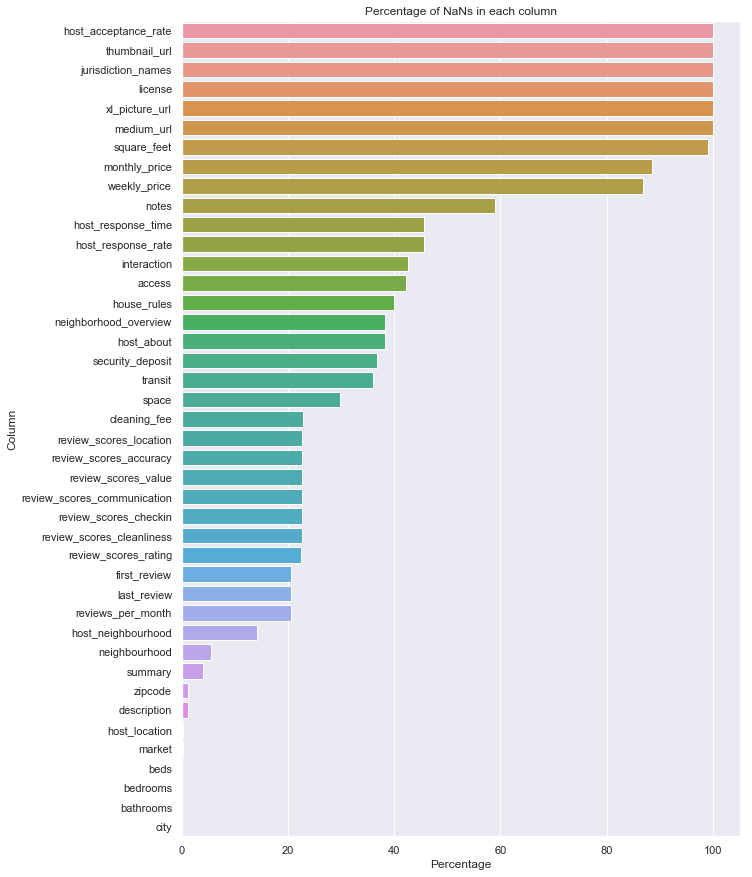

In [43]:
f, ax = plt.subplots(1,1, figsize=(10,15))
sns.set()
plot_nans(listings, ax=ax, annot=False, filter_out_zeros=True)

In [14]:
monu_cols_to_clean = ['id','host_response_time', 'host_response_rate',
       'host_is_superhost', 
       'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people','instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month']

cols_to_drop = ['listing_url','scrape_id', 'last_scraped','experiences_offered', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
               'host_url', 'host_name', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'street',
               'license']

col_list_1 = find_unique_elems([listings.columns, monu_cols_to_clean])

nlp_cols = \
['jurisdiction_names',
 'notes',
 'interaction',
 'access',
 'house_rules',
 'neighborhood_overview',
 'host_about',
 'transit',
 'space',
 'summary',
 'name',
 'description']

ssh_cols_to_clean = remove_childlist_from_parentlist(col_list_1, cols_to_drop)
ssh_cols_to_clean = remove_childlist_from_parentlist(ssh_cols_to_clean, nlp_cols)

--------------------------------------------

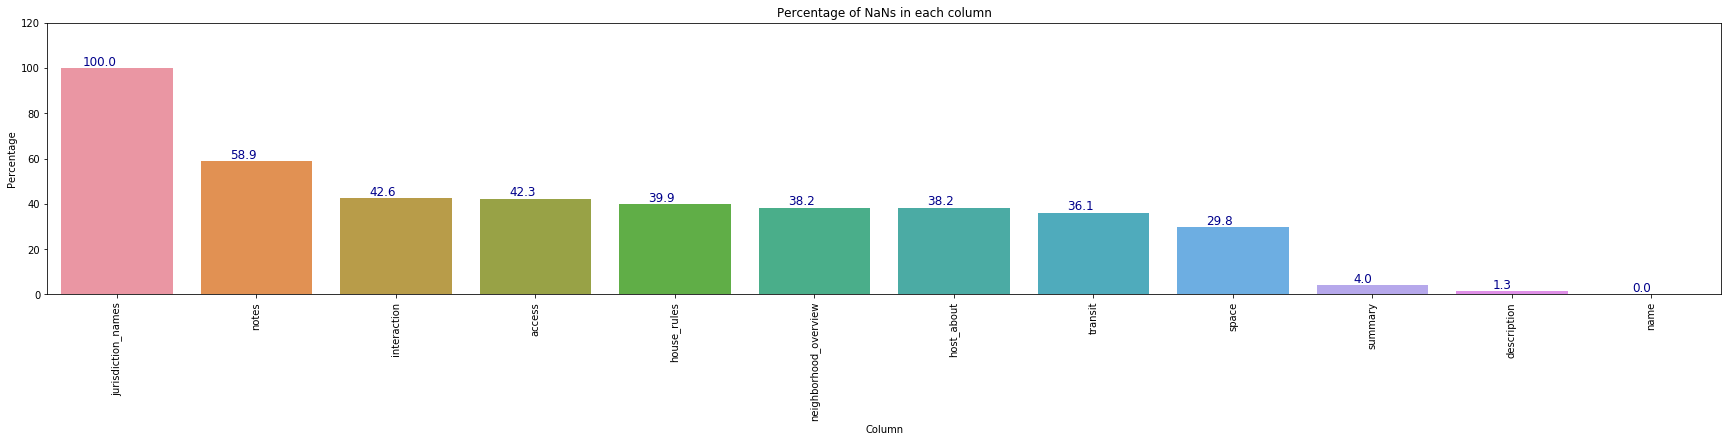

In [17]:
nlp_listings = listings[nlp_cols]
plot_nans(nlp_listings)

In [18]:
nlp_lencols = ["description", "host_about"]
nlp_listings["description"].fillna("", inplace=True)
nlp_listings["host_about"].fillna("", inplace=True)

nlp_listings["description"] = nlp_listings["description"].astype(str)
nlp_listings["host_about"] = nlp_listings["host_about"].astype(str)

nlp_listings["desc_len"] = nlp_listings["description"].apply(len)
nlp_listings["host_about_len"] = nlp_listings["host_about"].apply(len)

In [19]:
nlp_len_cols = ["description", "host_about", "desc_len", "host_about_len"]
nlp_listings[nlp_len_cols].head()

,description,host_about,desc_len,host_about_len
0,"Great light, exposed brick and 10 feet high ce...",,412,0
1,Renovated apt home in elevator building. Spaci...,Educated professional living in Brooklyn. I l...,392,431
2,"Find your romantic getaway to this beautiful, ...",A New Yorker since 2000! My passion is creatin...,1000,427
3,"This is a spacious, clean, furnished master be...",From Brooklyn with love.,1000,25
4,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,Make Up Artist National/ (Website hidden by Ai...,1000,354


-------------

In [20]:
cols_to_drop

['listing_url',
 'scrape_id',
 'last_scraped',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'street',
 'license']

In [21]:
listings = listings[ssh_cols_to_clean]

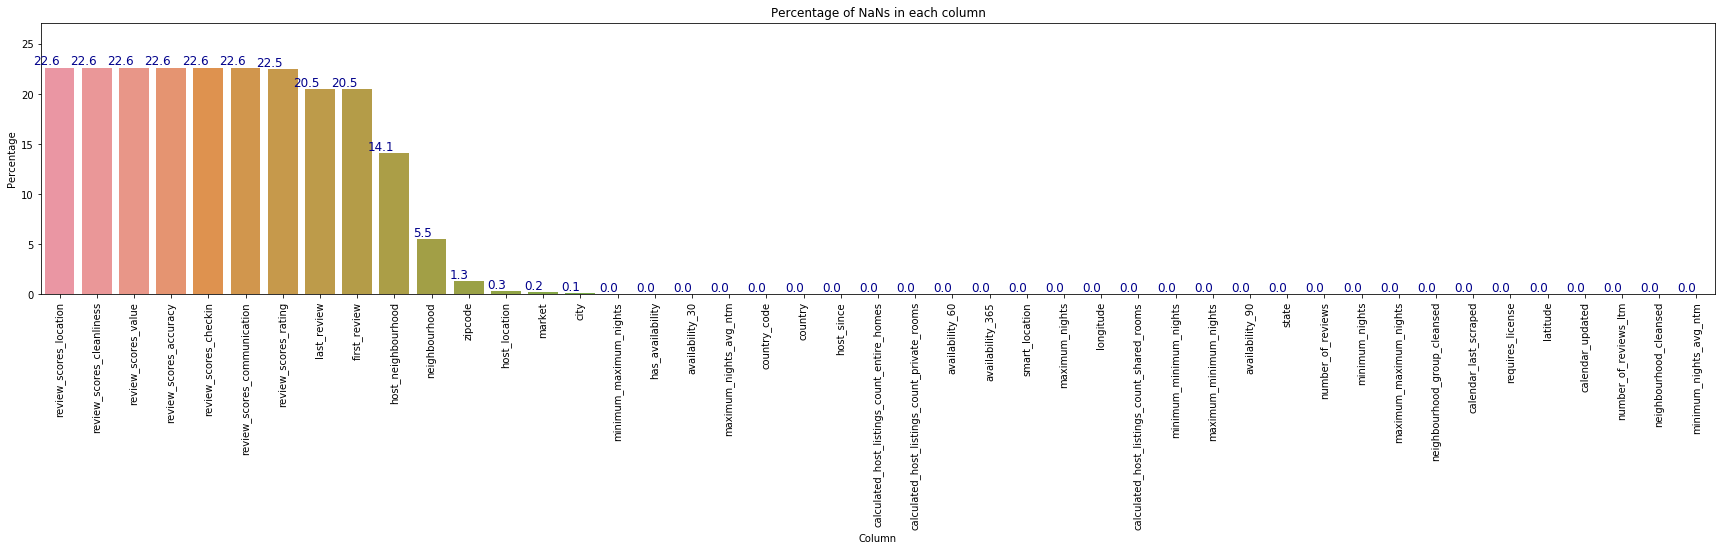

In [22]:
plot_nans(listings)

##### Make placeholders 

In [23]:
more_cols_to_drop = []

-----------------------------------

In [24]:
listings.head()

,availability_365,neighbourhood_cleansed,longitude,review_scores_value,calculated_host_listings_count_shared_rooms,minimum_minimum_nights,maximum_minimum_nights,availability_90,state,number_of_reviews,maximum_nights,minimum_nights,zipcode,city,neighbourhood_group_cleansed,host_location,calendar_last_scraped,requires_license,market,latitude,calendar_updated,number_of_reviews_ltm,minimum_nights_avg_ntm,maximum_maximum_nights,smart_location,minimum_maximum_nights,availability_60,review_scores_cleanliness,calculated_host_listings_count_entire_homes,review_scores_checkin,review_scores_communication,country_code,review_scores_location,availability_30,has_availability,maximum_nights_avg_ntm,first_review,last_review,country,review_scores_rating,host_since,neighbourhood,review_scores_accuracy,calculated_host_listings_count_private_rooms,host_neighbourhood
0,65,Midtown,-73.967679,NaN,0,7,7,65,NY,1,730,7,10022,New York,Manhattan,US,2019-02-01,f,New York,40.755523,2 days ago,1,7.0,730,"New York, NY",730,36,NaN,1,NaN,NaN,US,NaN,16,t,730.0,2019-01-30,2019-01-30,United States,NaN,2008-09-03,Midtown East,NaN,0,Midtown East
1,365,Kensington,-73.972370,10.0,3,1,1,90,NY,9,730,1,11218,Brooklyn,Brooklyn,"New York, New York, United States",2019-02-02,f,New York,40.647486,4 days ago,2,1.0,730,"Brooklyn , NY",730,60,10.0,0,10.0,10.0,US,10.0,30,t,730.0,2015-12-04,2018-10-19,United States,98.0,2008-09-07,Kensington,10.0,5,Gravesend
2,365,Midtown,-73.983774,9.0,1,1,1,90,NY,43,1125,1,10018,New York,Manhattan,"New York, New York, United States",2019-02-02,f,New York,40.753621,a week ago,14,1.0,1125,"New York, NY",1125,60,9.0,1,10.0,10.0,US,10.0,30,t,1125.0,2009-11-21,2019-01-02,United States,95.0,2008-09-09,Midtown,9.0,0,Midtown
3,290,Williamsburg,-73.942362,10.0,0,5,5,37,NY,39,730,5,11206,Brooklyn,Brooklyn,"New York, New York, United States",2019-02-02,f,New York,40.708558,2 weeks ago,12,5.0,730,"Brooklyn, NY",730,27,10.0,0,10.0,10.0,US,10.0,2,t,730.0,2010-01-04,2018-12-07,United States,97.0,2008-11-09,Williamsburg,10.0,3,East Williamsburg
4,365,Harlem,-73.941902,NaN,0,3,3,90,NY,0,7,3,10027,New York,Manhattan,"New York, New York, United States",2019-02-02,f,New York,40.809018,29 months ago,0,3.0,7,"New York, NY",7,60,NaN,0,NaN,NaN,US,NaN,30,t,7.0,NaN,NaN,United States,NaN,2008-11-25,Harlem,NaN,1,Harlem


In [25]:
listings.shape

(50220, 45)

## Country

In [26]:
listings["country"].value_counts()

United States    50220
Name: country, dtype: int64

In [27]:
listings["Peru"==listings["country"]]

,availability_365,neighbourhood_cleansed,longitude,review_scores_value,calculated_host_listings_count_shared_rooms,minimum_minimum_nights,maximum_minimum_nights,availability_90,state,number_of_reviews,maximum_nights,minimum_nights,zipcode,city,neighbourhood_group_cleansed,host_location,calendar_last_scraped,requires_license,market,latitude,calendar_updated,number_of_reviews_ltm,minimum_nights_avg_ntm,maximum_maximum_nights,smart_location,minimum_maximum_nights,availability_60,review_scores_cleanliness,calculated_host_listings_count_entire_homes,review_scores_checkin,review_scores_communication,country_code,review_scores_location,availability_30,has_availability,maximum_nights_avg_ntm,first_review,last_review,country,review_scores_rating,host_since,neighbourhood,review_scores_accuracy,calculated_host_listings_count_private_rooms,host_neighbourhood


Drop column? Peru seems to be an outlier. listings url is also invalid when checked.

## Review scores

Hypothesis: Most rows in the <b>review_scores_*</b> columns that have NaNs, have them for all the <b>review_scores_*</b> columns in that particular row.


i.e., if *review_scores_value* has a NaN, then so will *review_scores_location* and the other *review_scores_* columns.

Let's verify this by finding the columns that are NOT NaNs throughout all the review_scores_* columns.

In [7]:

review_scores_cols = ['review_scores_value', 'review_scores_location', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_rating']
nan_df = analyse_nans(listings[review_scores_cols])


# Verify that these columns have missing values in the exact same rows.
print("Number of rows between pairs of columns that have NaNs only in one of them - ")
for i in range(1, len(review_scores_cols)):
    print(review_scores_cols[i], "\t", review_scores_cols[i-1], end=" -->\t ")
    idx1 = nan_df[review_scores_cols[i-1]].iloc[2]
    idx2 = nan_df[review_scores_cols[i]].iloc[2]
    l = find_unique_elems([idx1, idx2])
    print(len(l), "rows, \ti.e.", round(100*len(l)/listings.shape[0], 2), "% of total listings rows")

Number of rows between pairs of columns that have NaNs only in one of them - 
review_scores_location 	 review_scores_value -->	 17 rows, 	i.e. 0.03 % of total listings rows
review_scores_checkin 	 review_scores_location -->	 19 rows, 	i.e. 0.04 % of total listings rows
review_scores_cleanliness 	 review_scores_checkin -->	 43 rows, 	i.e. 0.09 % of total listings rows
review_scores_communication 	 review_scores_cleanliness -->	 28 rows, 	i.e. 0.06 % of total listings rows
review_scores_accuracy 	 review_scores_communication -->	 31 rows, 	i.e. 0.06 % of total listings rows
review_scores_rating 	 review_scores_accuracy -->	 47 rows, 	i.e. 0.09 % of total listings rows


Majority of rows have NaNs throughout all the review_scores_* columns. However, there are a few that don't as well.

Plot a distribution of Review Scores

In [8]:
listings[review_scores_cols].describe()

,review_scores_value,review_scores_location,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_accuracy,review_scores_rating
count,38848.000000,38847.000000,38852.000000,38889.000000,38877.000000,38874.000000,38913.000000
mean,9.376184,9.527016,9.738315,9.265319,9.752064,9.605263,93.782695
std,0.902918,0.776485,0.711515,1.078683,0.704248,0.833096,8.468368
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000
25%,9.000000,9.000000,10.000000,9.000000,10.000000,9.000000,91.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,96.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000


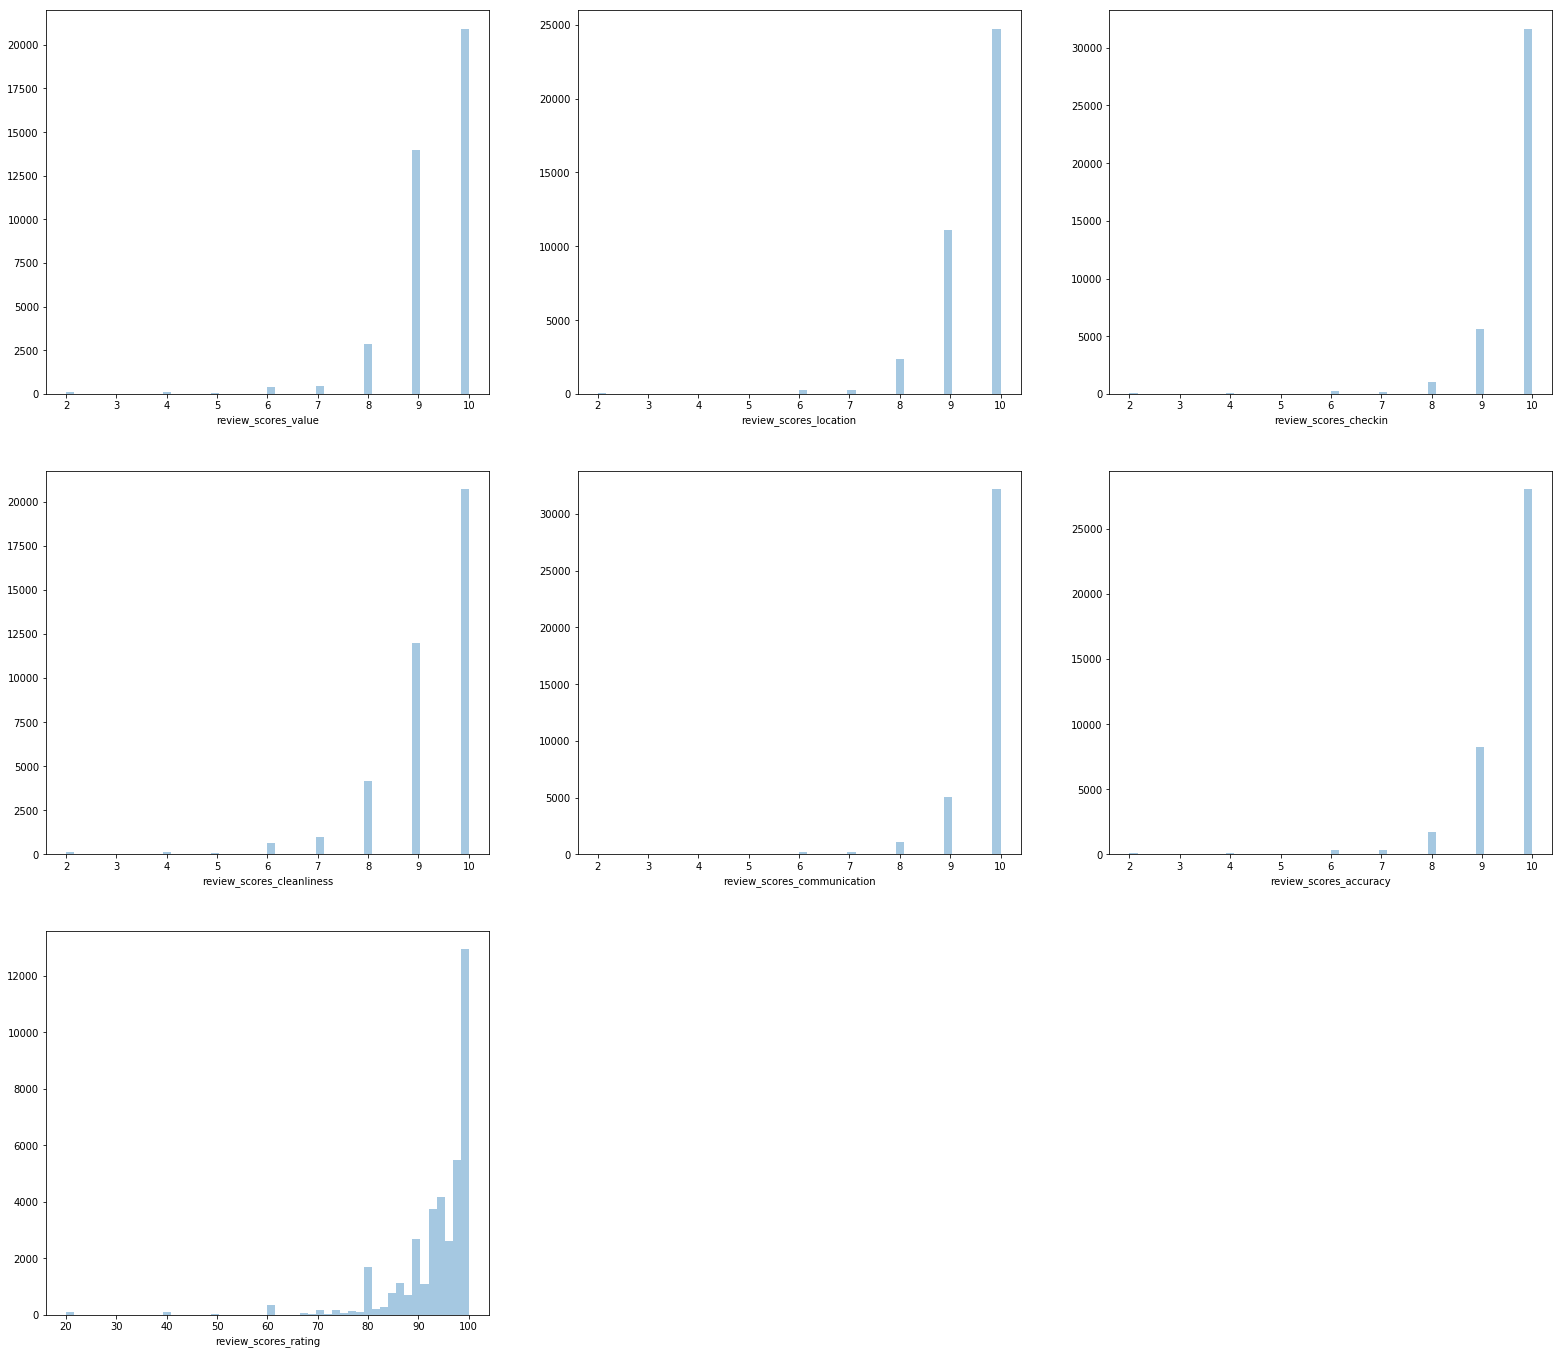

In [9]:
# Uncomment these lines to see histograms of the review scores columns
f, ax = plt.subplots(3,3, figsize=(27,24))
col_counter = 0
g = sns.distplot(a=listings[~listings[review_scores_cols[col_counter]].isna()][review_scores_cols[col_counter]], ax=ax[0][0], kde=False)
col_counter+=1
g = sns.distplot(a=listings[~listings[review_scores_cols[col_counter]].isna()][review_scores_cols[col_counter]], ax=ax[0][1], kde=False)
col_counter+=1
g = sns.distplot(a=listings[~listings[review_scores_cols[col_counter]].isna()][review_scores_cols[col_counter]], ax=ax[0][2], kde=False)
col_counter+=1
g = sns.distplot(a=listings[~listings[review_scores_cols[col_counter]].isna()][review_scores_cols[col_counter]], ax=ax[1][0], kde=False)
col_counter+=1
g = sns.distplot(a=listings[~listings[review_scores_cols[col_counter]].isna()][review_scores_cols[col_counter]], ax=ax[1][1], kde=False)
col_counter+=1
g = sns.distplot(a=listings[~listings[review_scores_cols[col_counter]].isna()][review_scores_cols[col_counter]], ax=ax[1][2], kde=False)
col_counter+=1
g = sns.distplot(a=listings[~listings[review_scores_cols[col_counter]].isna()][review_scores_cols[col_counter]], ax=ax[2][0], kde=False)
col_counter+=1
ax[2][1].set_visible(not ax[2][1].get_visible())
ax[2][2].set_visible(not ax[2][2].get_visible())

Well, skewed distributions throughout as expected. Transformations might prove useful here to compensate for the large left skew. 

We could fill the missing values of each columns with the integer part of its median.

In [26]:
for col in review_scores_cols:
    listings[col].fillna(listings[col].median(), inplace=True)

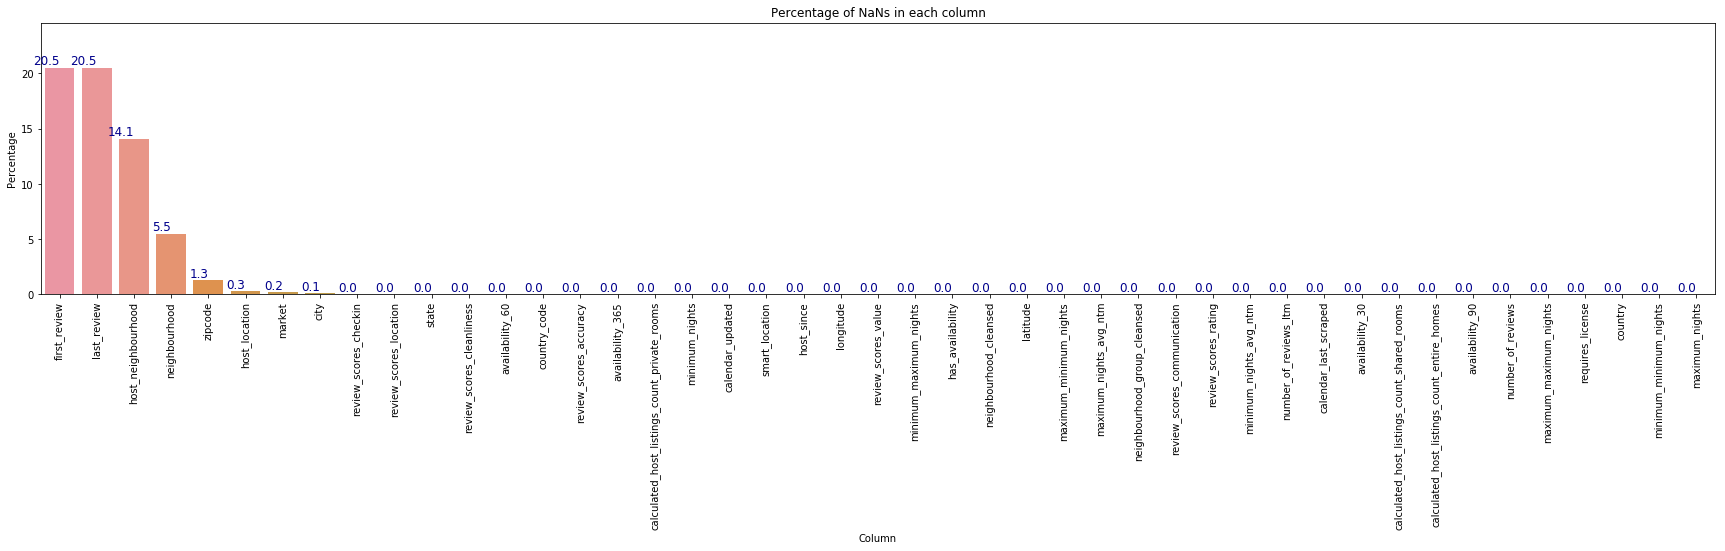

In [27]:
plot_nans(listings)

##  city, market, zipcode, neighbourhood, host_neighbourhood

In [28]:
geo_cols = ["city", "neighbourhood","neighbourhood_cleansed", "neighbourhood_group_cleansed", "market", "host_neighbourhood"]
listings[listings["city"].isna()][geo_cols].head()

,city,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,market,host_neighbourhood
8208,NaN,Sunset Park,Sunset Park,Brooklyn,New York,Sunset Park
10646,NaN,Astoria,Astoria,Queens,New York,Astoria
10857,NaN,NaN,Astoria,Queens,New York,Astoria
10880,NaN,Astoria,Astoria,Queens,New York,Astoria
10882,NaN,NaN,Astoria,Queens,New York,Astoria


### city

In [29]:
listings["city"].fillna("NYC", inplace=True)

### market

In [30]:
listings["market"].value_counts()

New York                       50066
Other (Domestic)                  19
Adirondacks                        2
Catskills and Hudson Valley        1
Los Angeles                        1
Cuba                               1
Agra                               1
Atlanta                            1
Paris                              1
San Francisco                      1
D.C.                               1
Boston                             1
Jamaica South Coast                1
South Bay, CA                      1
New Orleans                        1
Kyoto                              1
Lagos, NG                          1
Name: market, dtype: int64

In [31]:
no_geonan_listings = listings[geo_cols].dropna()

In [32]:
for market in no_geonan_listings["market"].unique():
    print(market, "  -->  ", no_geonan_listings[no_geonan_listings["market"]==market]["neighbourhood_group_cleansed"].unique()[:10])

New York   -->   ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
Other (Domestic)   -->   ['Queens' 'Brooklyn' 'Manhattan']
Boston   -->   ['Brooklyn']
Los Angeles   -->   ['Manhattan']
Atlanta   -->   ['Brooklyn']
Paris   -->   ['Brooklyn']
New Orleans   -->   ['Brooklyn']
San Francisco   -->   ['Manhattan']
Cuba   -->   ['Queens']
D.C.   -->   ['Brooklyn']
Lagos, NG   -->   ['Brooklyn']
Agra   -->   ['Manhattan']
Catskills and Hudson Valley   -->   ['Brooklyn']
Kyoto   -->   ['Brooklyn']
Adirondacks   -->   ['Brooklyn']
Jamaica South Coast   -->   ['Queens']


In [33]:
map_nbc_market = {}
for nbc in no_geonan_listings["neighbourhood_cleansed"].unique():
    map_nbc_market[nbc] = listings[listings["neighbourhood_cleansed"]==nbc]["market"].unique()

In [34]:
map_nbc_market

{'Midtown': array(['New York', nan], dtype=object),
 'Kensington': array(['New York', 'Other (Domestic)'], dtype=object),
 'Williamsburg': array(['New York', 'D.C.', 'Kyoto', nan], dtype=object),
 'Harlem': array(['New York', 'Agra', nan], dtype=object),
 'Clinton Hill': array(['New York', nan], dtype=object),
 "Hell's Kitchen": array(['New York', nan], dtype=object),
 'Upper West Side': array(['New York', nan], dtype=object),
 'Flatiron District': array(['New York', 'Other (Domestic)', nan], dtype=object),
 'Chinatown': array(['New York'], dtype=object),
 'Upper East Side': array(['New York', nan, 'Other (Domestic)'], dtype=object),
 'South Slope': array(['New York'], dtype=object),
 'West Village': array(['New York', 'San Francisco', nan], dtype=object),
 'East Harlem': array(['New York', nan], dtype=object),
 'Fort Greene': array(['New York'], dtype=object),
 'Chelsea': array(['New York', nan], dtype=object),
 'Crown Heights': array(['New York', 'Paris', nan], dtype=object),
 'Park 

Fill the market using the neighbourhood_cleansed column

In [35]:
def impute_market(row):
    if type(row["market"]) != type("a"):
        nb_cleansed = row["neighbourhood_cleansed"]
        val = map_nbc_market[nb_cleansed][0]
        return val
    else:
        return row
    return row

listings["market"] = listings[["market", "neighbourhood_cleansed"]].apply(impute_market, axis=1)

### host_location and host_neighbourhood

In [36]:
listings["host_location"].fillna("XX", inplace=True)

In [37]:
listings["host_neighbourhood"].fillna("XX", inplace=True)

### neighbourhood

It might be safer to set the missing values in this column with the same ones from "neighbourhood_cleansed"

In [38]:
listings["neighbourhood"].fillna(listings["neighbourhood_cleansed"], inplace=True)

### Zipcode

In [39]:
len(listings["zipcode"].unique())

378

In [40]:
listings["zipcode"].fillna("XX", inplace=True)

## First review and last review

Date columns. Why are there missing values?

In [10]:
review_date_cols = ["first_review", "last_review"]
nan_df = analyse_nans(listings)

# Verify that these columns have missing values in the exact same rows.
print("Number of rows between pairs of columns that have NaNs only in one of them - ")
for i in range(1, len(review_date_cols)):
    print(review_date_cols[i], "\t", review_date_cols[i-1], end=" -->\t ")
    idx1 = nan_df[review_date_cols[i-1]].iloc[2]
    idx2 = nan_df[review_date_cols[i]].iloc[2]
    l = find_unique_elems([idx1, idx2])
    print(len(l), "rows, \ti.e.", round(100*len(l)/listings.shape[0], 2), "% of total listings rows")

Number of rows between pairs of columns that have NaNs only in one of them - 
last_review 	 first_review -->	 0 rows, 	i.e. 0.0 % of total listings rows


In [11]:
listings[(~listings["last_review"].isna())&(listings["first_review"].isna()) |\
        (~listings["first_review"].isna())&(listings["last_review"].isna())]

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [12]:
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['lreview_year'] = listings['last_review'].dt.year
listings['lreview_month'] = listings['last_review'].dt.month
listings['lreview_day'] = listings['last_review'].dt.day

listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['freview_year'] = listings['first_review'].dt.year
listings['freview_month'] = listings['first_review'].dt.month
listings['freview_day'] = listings['first_review'].dt.day

In [13]:
cols = ["last_review", 'lreview_year', 'lreview_month', 'lreview_day']
listings[cols].describe()

,lreview_year,lreview_month,lreview_day
count,39931.000000,39931.000000,39931.000000
mean,2017.998247,5.644687,14.929178
std,1.133024,4.536616,10.082954
min,2010.000000,1.000000,1.000000
25%,2018.000000,1.000000,5.000000
50%,2018.000000,5.000000,15.000000
75%,2019.000000,10.000000,24.000000
max,2019.000000,12.000000,31.000000


In [14]:
sns.set(font_scale=2, style="whitegrid")

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'Day of month'),
 Text(0.5, 1.0, 'Reviews over days')]

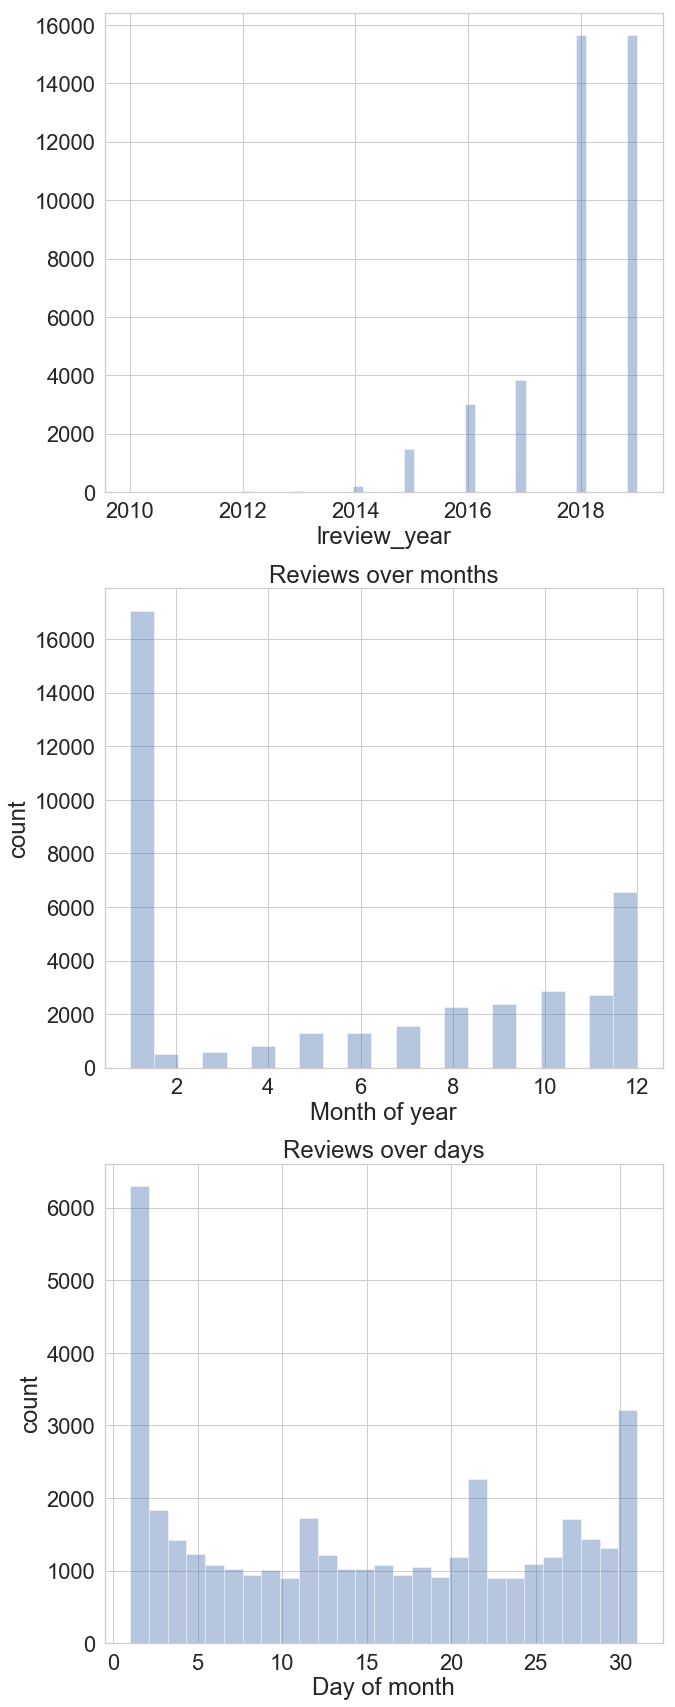

In [16]:
f, ax = plt.subplots(3, 1, figsize=(10, 30))
g = sns.distplot(a=listings[~listings["lreview_year"].isna()]["lreview_year"], ax=ax[0], kde=False)
g = sns.distplot(a=listings[~listings["lreview_month"].isna()]["lreview_month"], ax=ax[1], kde=False)
g.set(title="Reviews over months", xlabel="Month of year", ylabel="count")
g = sns.distplot(a=listings[~listings["lreview_day"].isna()]["lreview_day"], ax=ax[2], kde=False)
g.set(title="Reviews over days", xlabel="Day of month", ylabel="count")

If we use median, we can estimate that the missing year values is (most probably) 2018, the missing month values is (most probably) 10/11 and for date would be around 16.

Or we can create a separate category called X for each column, to estimate that there has been no review written for those dates yet.Upon checking online using the URLs provided, we can verify that no reviews are provided for those listings yet. 

The latter method is used for imputation here.

In [47]:
listings["lreview_year"].apply(type)

0        <class 'float'>
1        <class 'float'>
2        <class 'float'>
3        <class 'float'>
4        <class 'float'>
5        <class 'float'>
6        <class 'float'>
7        <class 'float'>
8        <class 'float'>
9        <class 'float'>
10       <class 'float'>
11       <class 'float'>
12       <class 'float'>
13       <class 'float'>
14       <class 'float'>
15       <class 'float'>
16       <class 'float'>
17       <class 'float'>
18       <class 'float'>
19       <class 'float'>
20       <class 'float'>
21       <class 'float'>
22       <class 'float'>
23       <class 'float'>
24       <class 'float'>
25       <class 'float'>
26       <class 'float'>
27       <class 'float'>
28       <class 'float'>
29       <class 'float'>
30       <class 'float'>
31       <class 'float'>
32       <class 'float'>
33       <class 'float'>
34       <class 'float'>
35       <class 'float'>
36       <class 'float'>
37       <class 'float'>
38       <class 'float'>
39       <class 'float'>


In [49]:
listings["first_review"].fillna("XX", inplace=True)
listings["last_review"].fillna("XX", inplace=True)
listings['lreview_year'].fillna(0, inplace=True)
listings['lreview_month'].fillna(0, inplace=True)
listings['lreview_day'].fillna(0, inplace=True)
listings['freview_year'].fillna(0, inplace=True)
listings['freview_month'].fillna(0, inplace=True)
listings['freview_day'].fillna(0, inplace=True)

In [54]:
listings['ndays_between_f_l_reviews'] = abs(listings['lreview_day'] - listings['freview_day'])

In [ ]:
listings

In [55]:
listings['ndays_between_f_l_reviews'].head()

0     0.0
1    15.0
2    19.0
3     3.0
4     0.0
Name: ndays_between_f_l_reviews, dtype: float64

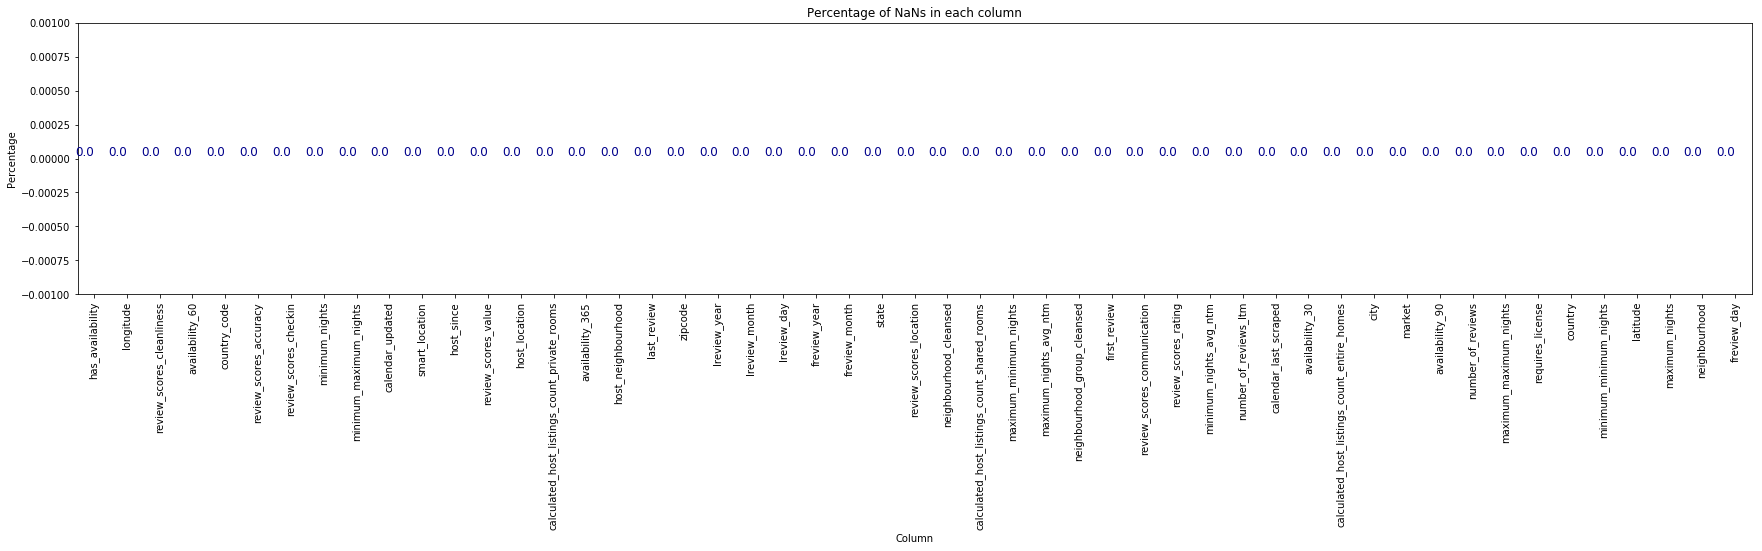

In [51]:
plot_nans(listings)